# Introduction to Data Visualization with Seaborn
Run the hidden code cell below to import the data used in this course.

In [61]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the course datasets
country_data = pd.read_csv('datasets/countries-of-the-world.csv', decimal=",")
mpg = pd.read_csv('datasets/mpg.csv')
student_data = pd.read_csv('datasets/student-alcohol-consumption.csv', index_col=0)
survey = pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- From `country_data`, create a scatter plot to look at the relationship between GDP and Literacy. Use color to segment the data points by region.
- Use `mpg` to create a line plot with `model_year` on the x-axis and `weight` on the y-axis. Create differentiating lines for each country of origin (`origin`). 
- Create a box plot from `student_data` to explore the relationship between the number of failures (`failures`) and the average final grade (`G3`).
- Create a bar plot from `survey` to compare how `Loneliness` differs across values for `Internet usage`. Format it to have two subplots for gender.
- Make sure to add titles and labels to your plots and adjust their format for readability!

# **1/ chap1:(introduction to seaborn)**
Making a scatter plot with lists

- From country_data, create a scatter plot to look at the relationship between GDP and Literacy. Use color to segment the data points by region.

gdp= [700.0, 4500.0, 6000.0, 8000.0, 19000.0] 
phones: [3.2, 71.2, 78.1, 259.5, 497.2] 
percent_literate [36.0, 86.5, 70.0, 97.0, 100.0]


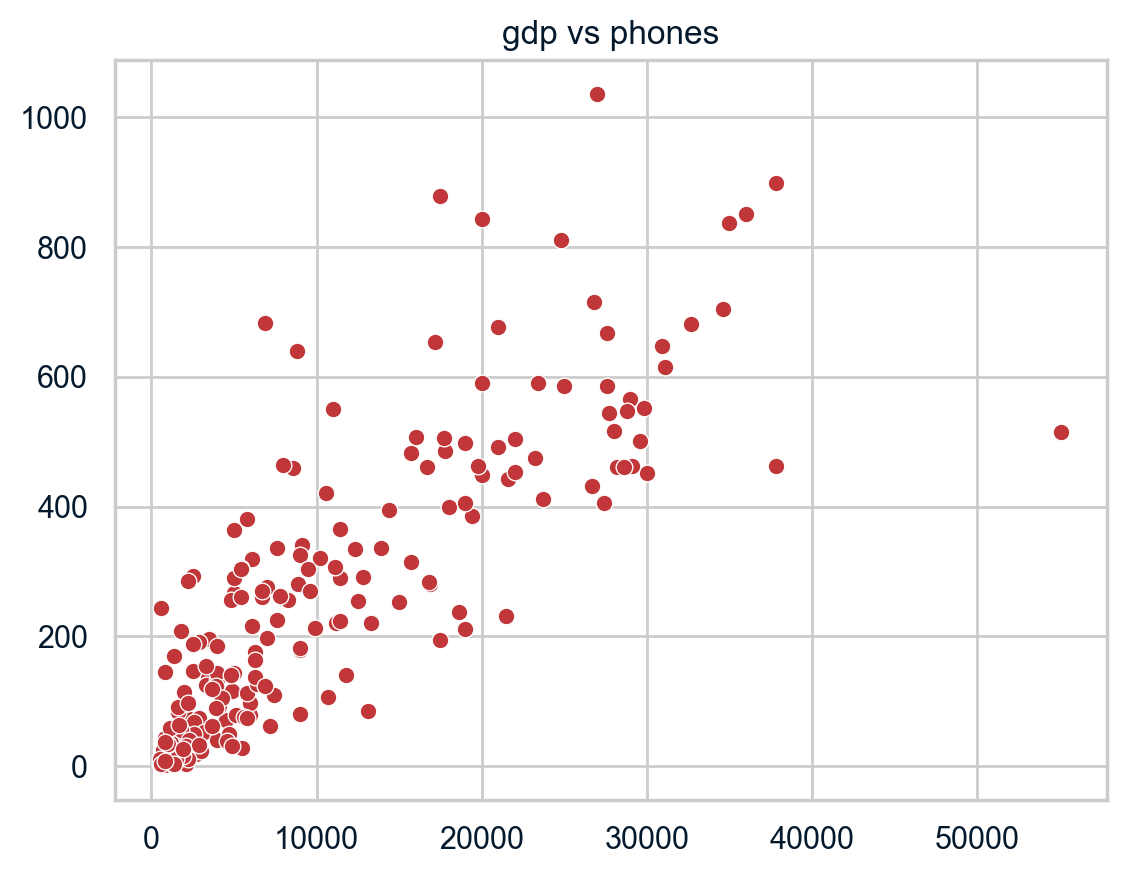

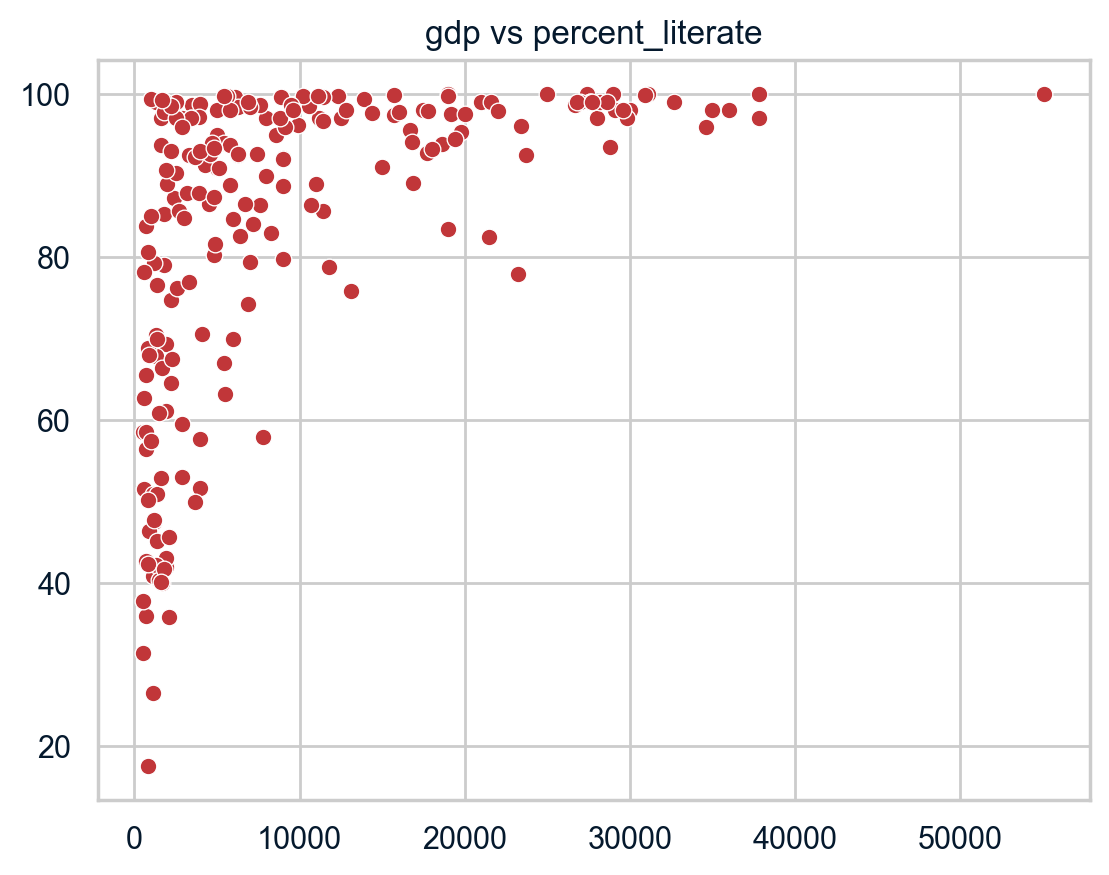

In [63]:
# Extracting the required columns from country_data DataFrame
gdp = country_data["GDP ($ per capita)"].tolist()
phones = country_data["Phones (per 1000)"].tolist()
percent_literate = country_data["Literacy (%)"].tolist()
print("gdp=",gdp[:5],"\nphones:",phones[:5],"\npercent_literate",percent_literate[:5])
#We've created three lists of data from this dataset to get you started. gdp is a list that contains the value of GDP per country, expressed as dollars per person. phones is a list of the number of mobile phones per 1,000 people in that country. Finally, percent_literate is a list that contains the percent of each country's population that can read and write.

# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=gdp, y=phones)
plt.title("gdp vs phones")
plt.show()

# Change this scatter plot to have percent literate on the y-axis
sns.scatterplot(x=gdp, y=percent_literate)
plt.title("gdp vs percent_literate")
plt.show()

### **Making a count plot with a list:**
In the last exercise, we explored a dataset that contains information about 227 countries. Let's do more exploration of this data - specifically, how many countries are in each region of the world?

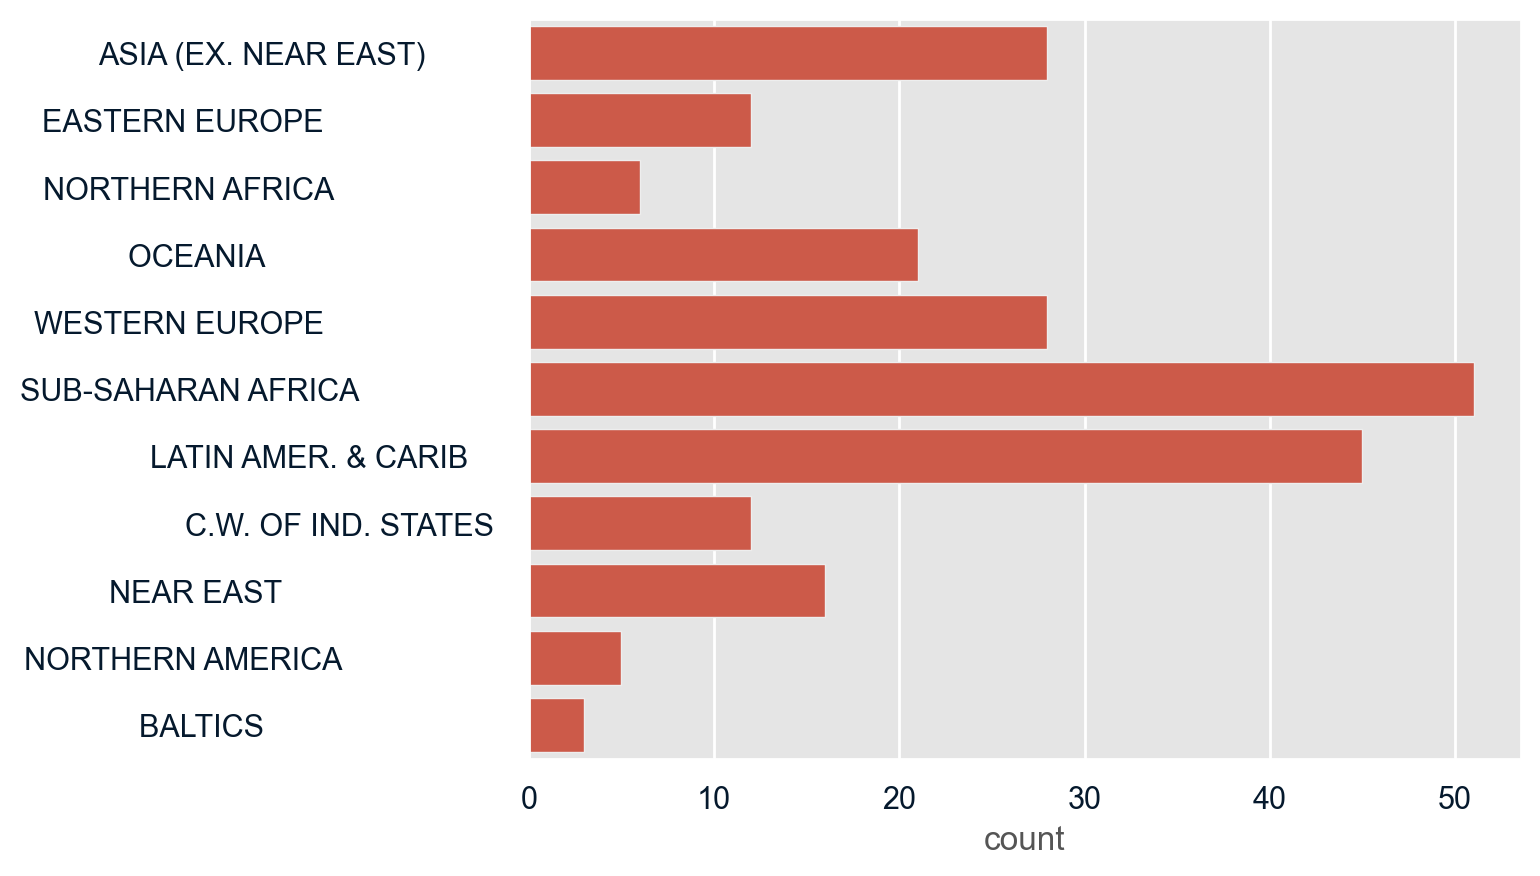

In [64]:
# Extract the 'Region' column from country_data DataFrame and convert it to a list
region = country_data["Region"].tolist()
plt.style.use("ggplot")
# Create count plot with region on the y-axis
sns.countplot(y=region)
plt.show()

### **Making a count plot with a DataFrame**

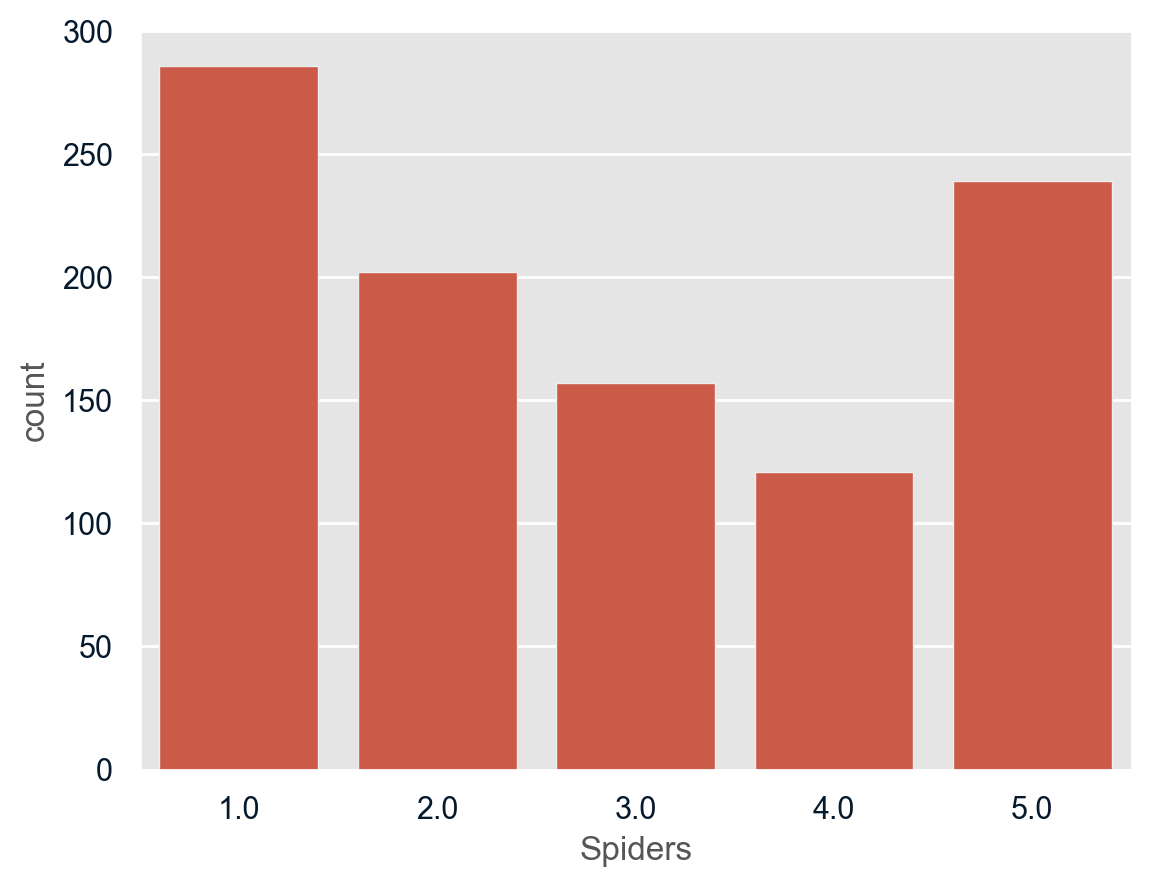

In [65]:
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x='Spiders', data=survey)
plt.show()

### **Hue and scatter plots**

 we'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

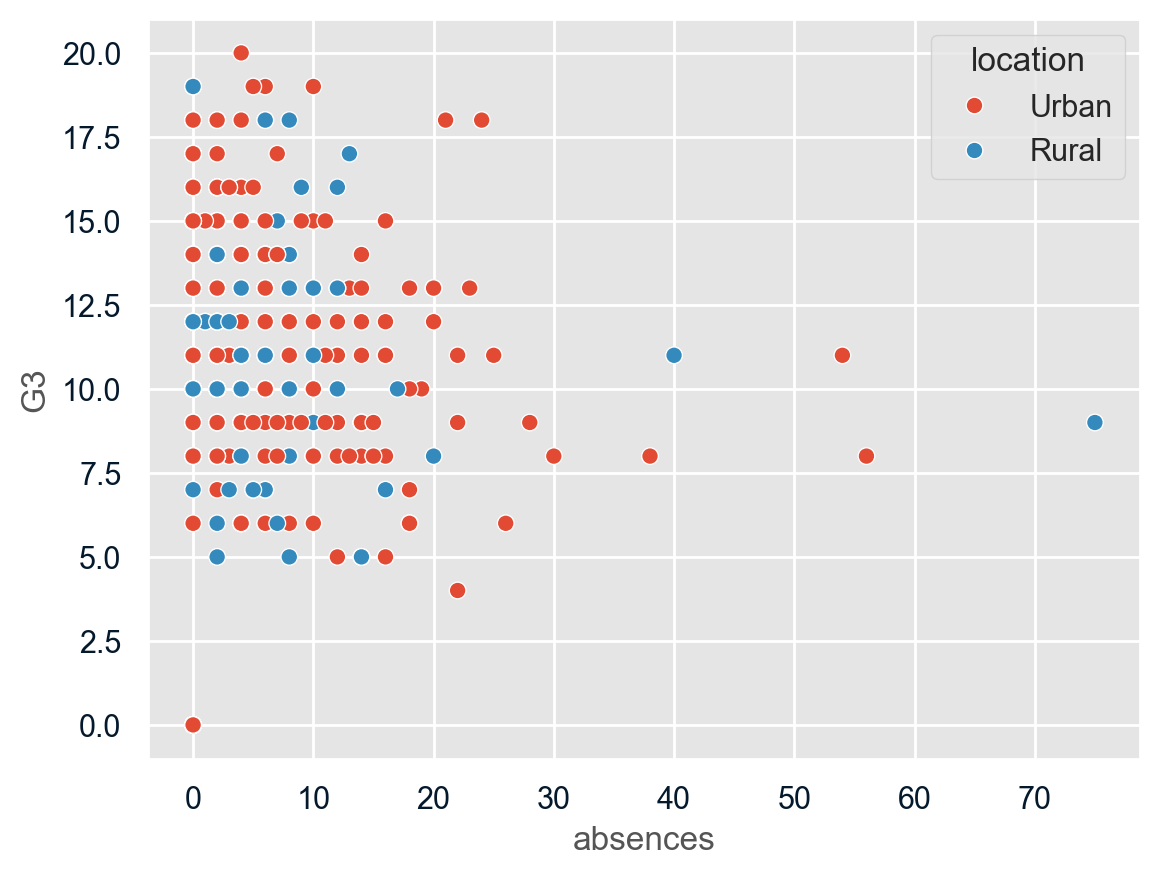

In [66]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences",y="G3",data=student_data,hue="location")
# Change the legend order in the scatter plot
#sns.scatterplot(x="absences", y="G3", 
#               data=student_data, 
#               hue="location",hue_order=["Rural","Urban"])
plt.show()



### **Hue and count plots**
Let's continue exploring our dataset from students in secondary school by looking at a new variable. The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

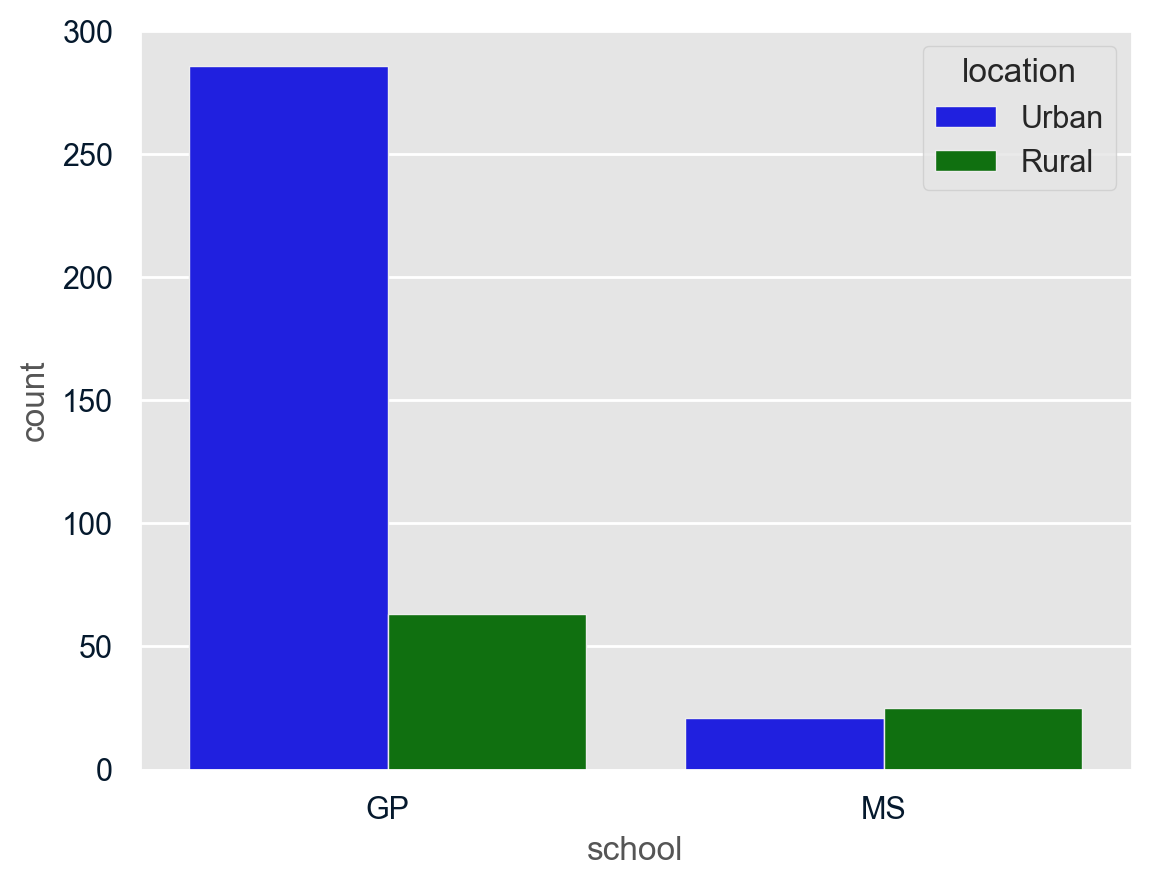

In [67]:
# Create a dictionary mapping subgroup values to colors
palette_color = {"Rural": "green", "Urban": "blue"}
# Create a count plot of school with location subgroups
sns.countplot(x="school",data=student_data,hue="location",palette=palette_color)
plt.show()

# **CHAP2:(relational plots & subplots)**
### **Creating subplots with col and row**
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

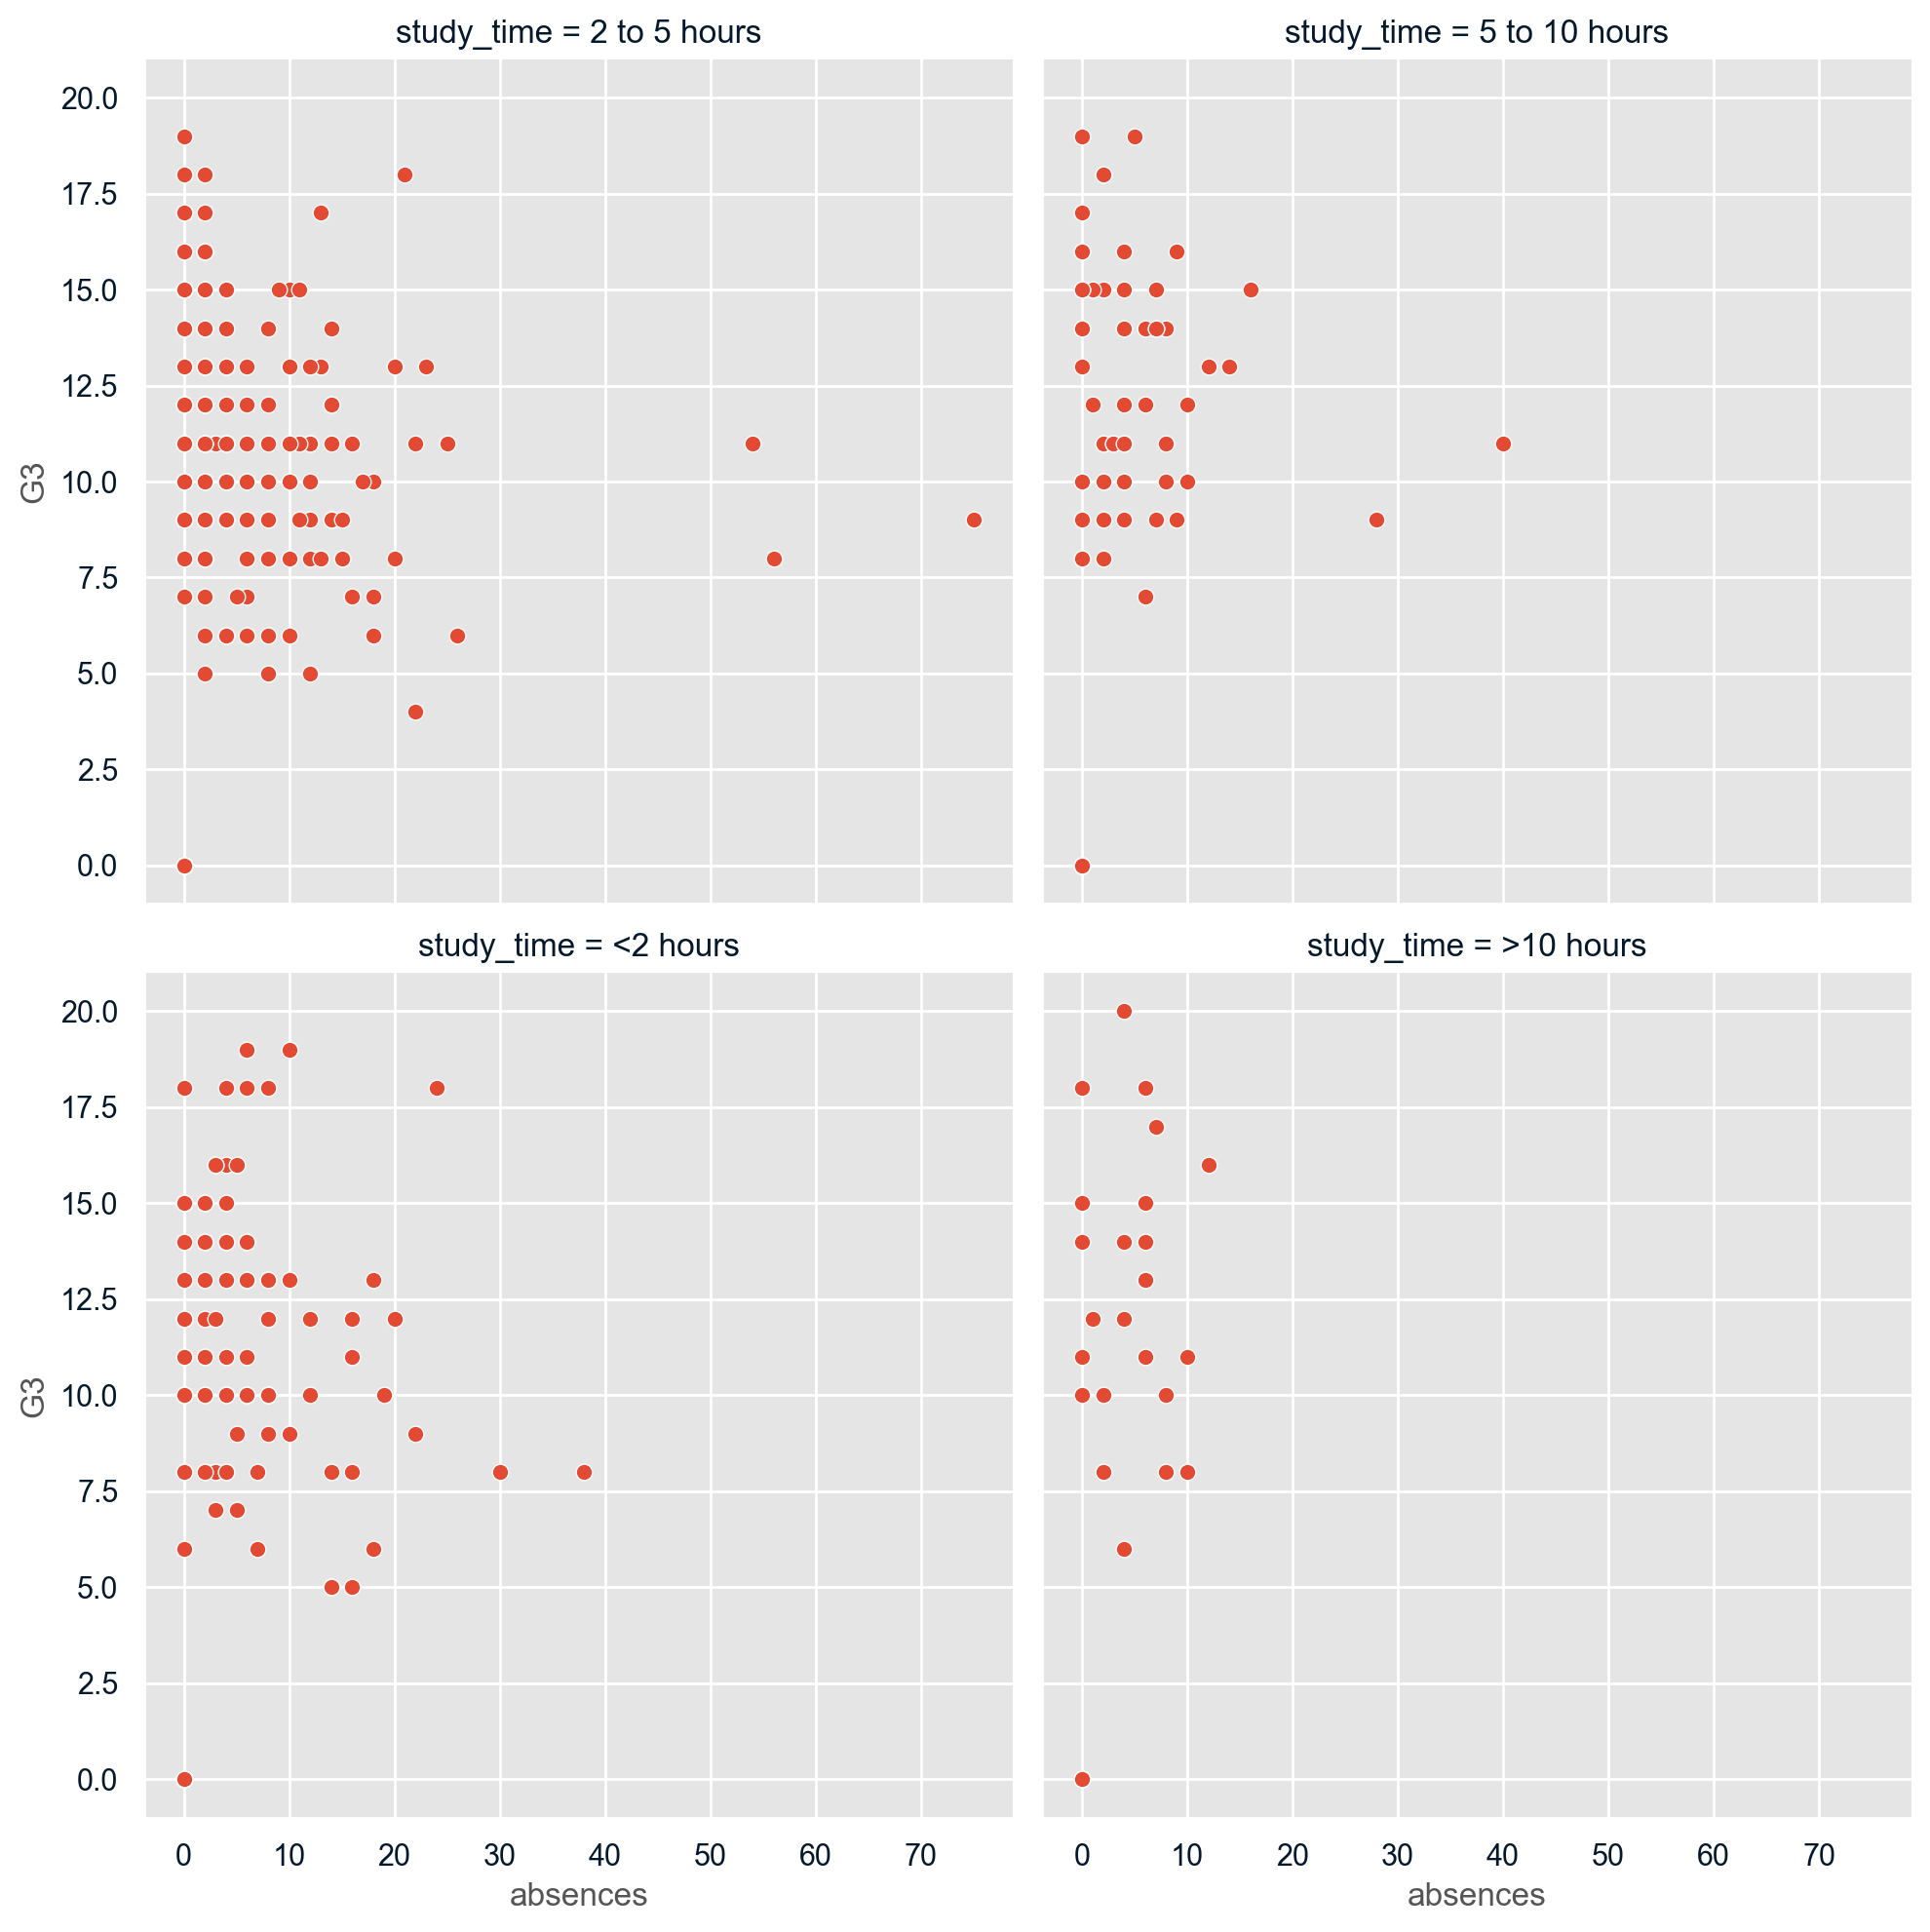

In [68]:
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            col="study_time"
            ,col_wrap=2
            )
#we can use row insted of col 
plt.show()

### **Creating two-factor subplots**
Let's continue looking at the student_data dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?


There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

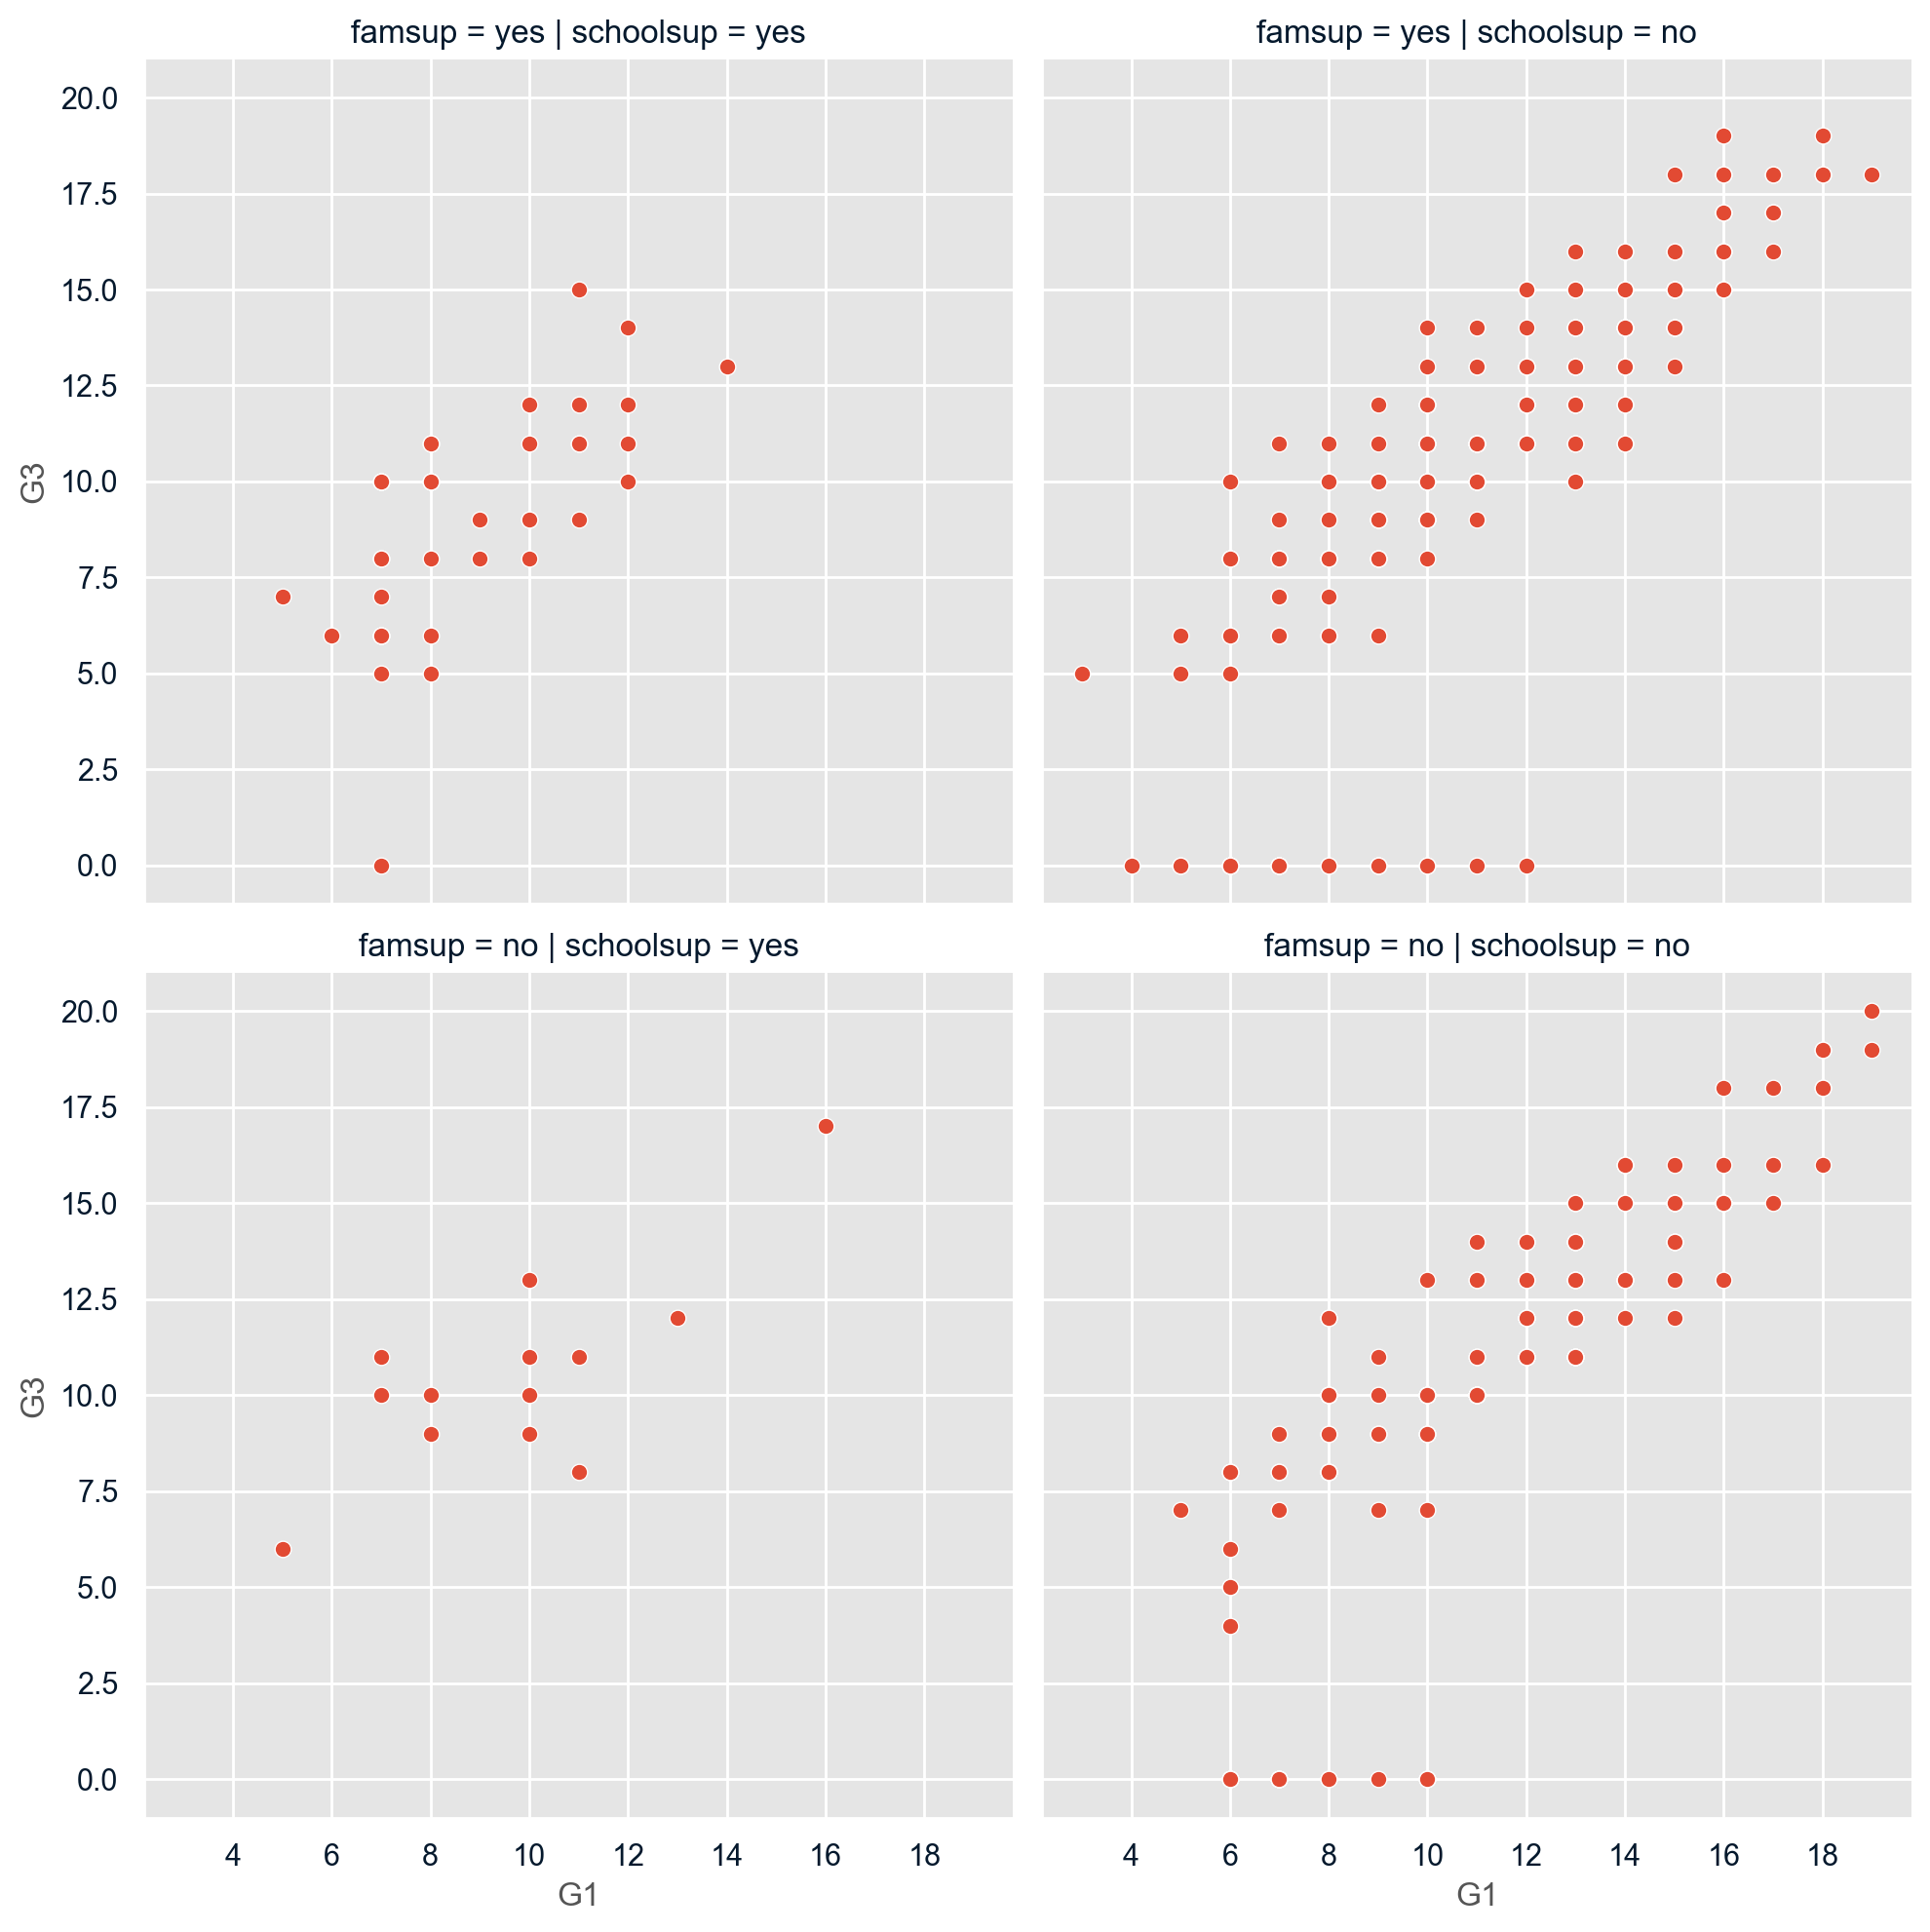

In [69]:
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row="famsup",
            row_order=["yes", "no"])
plt.show()

### **Changing the size of scatter plot points**
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

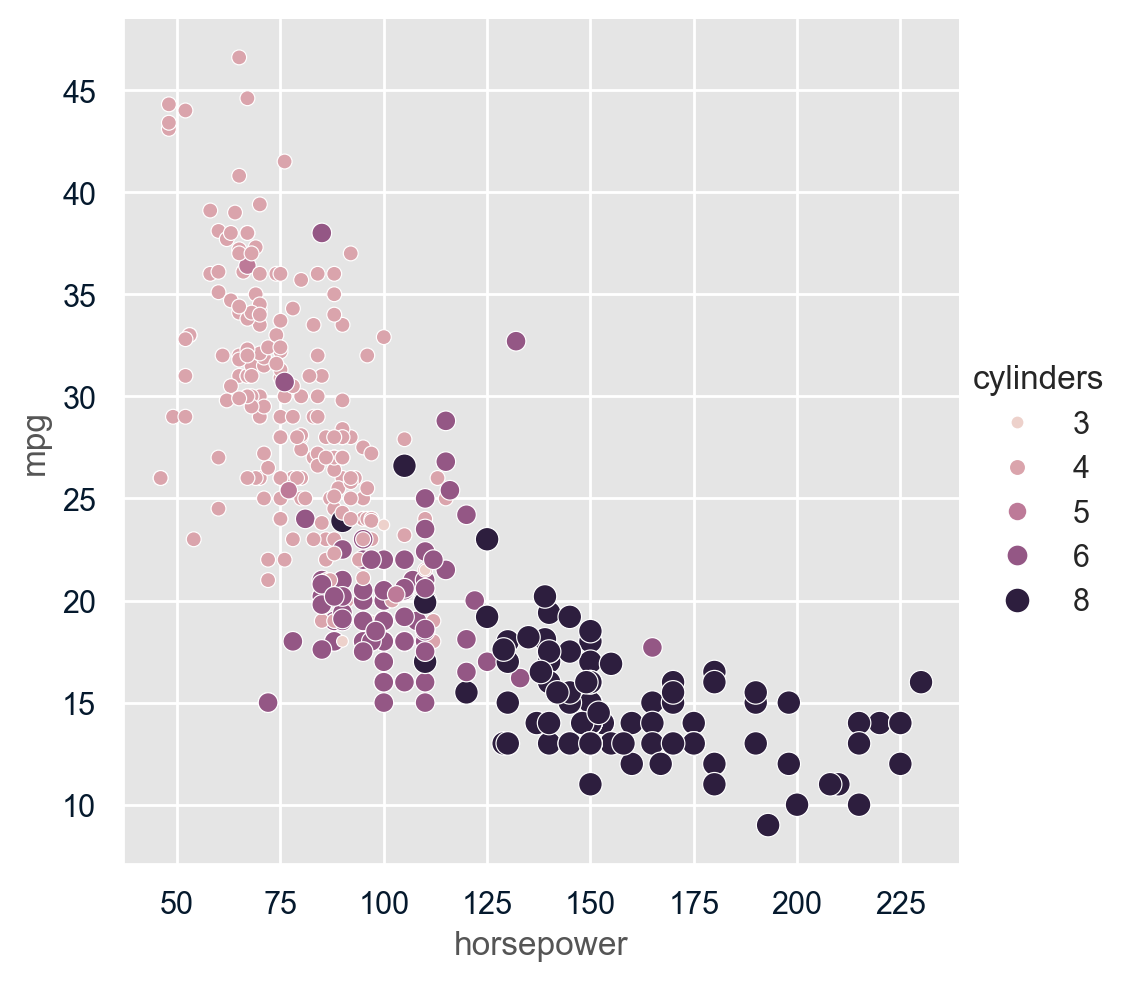

In [70]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",hue="cylinders")
plt.show()

### **Changing the style of scatter plot points**
Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

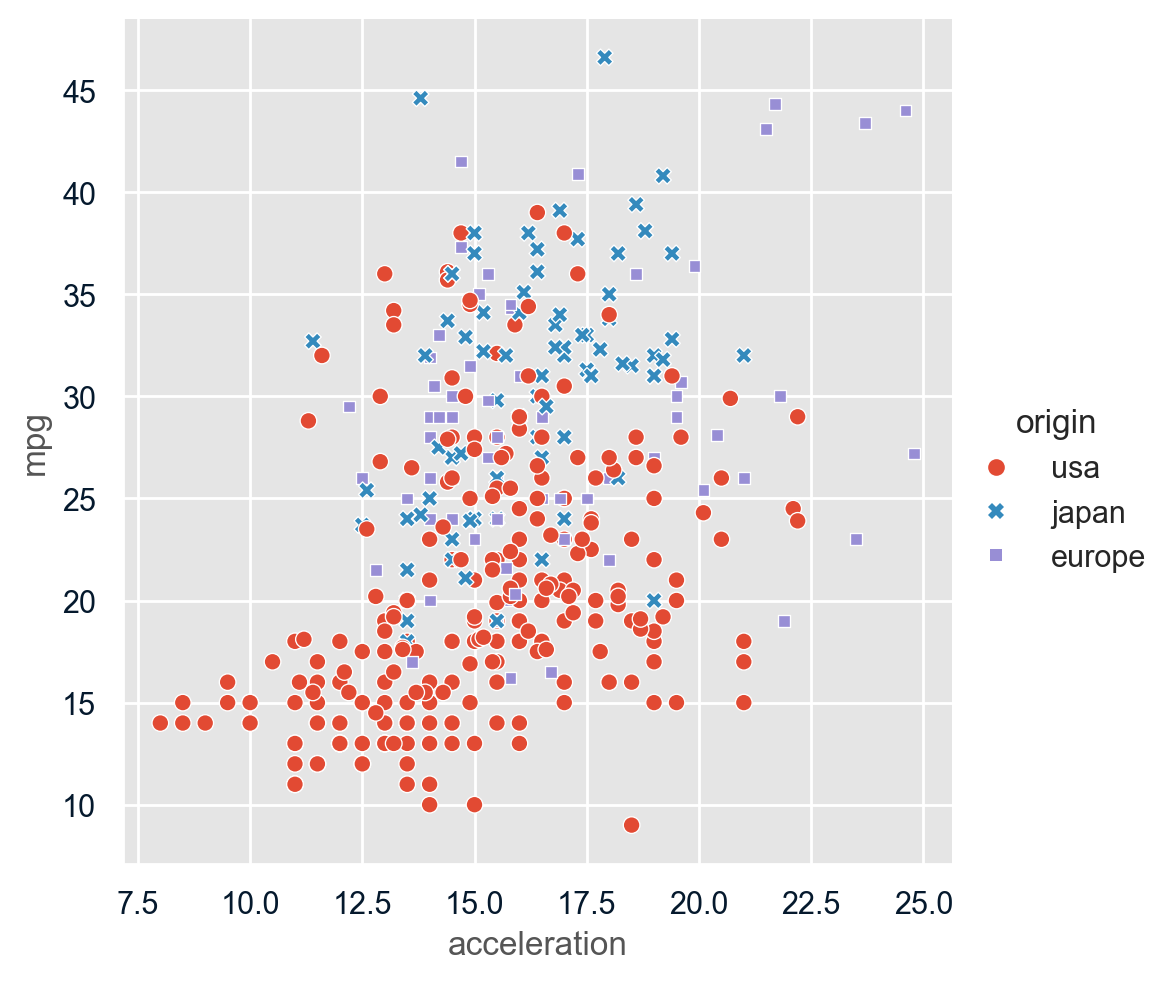

In [71]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(kind="scatter",y="mpg",x="acceleration",data=mpg,style="origin",hue="origin")
plt.show()

### **Interpreting line plots**
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

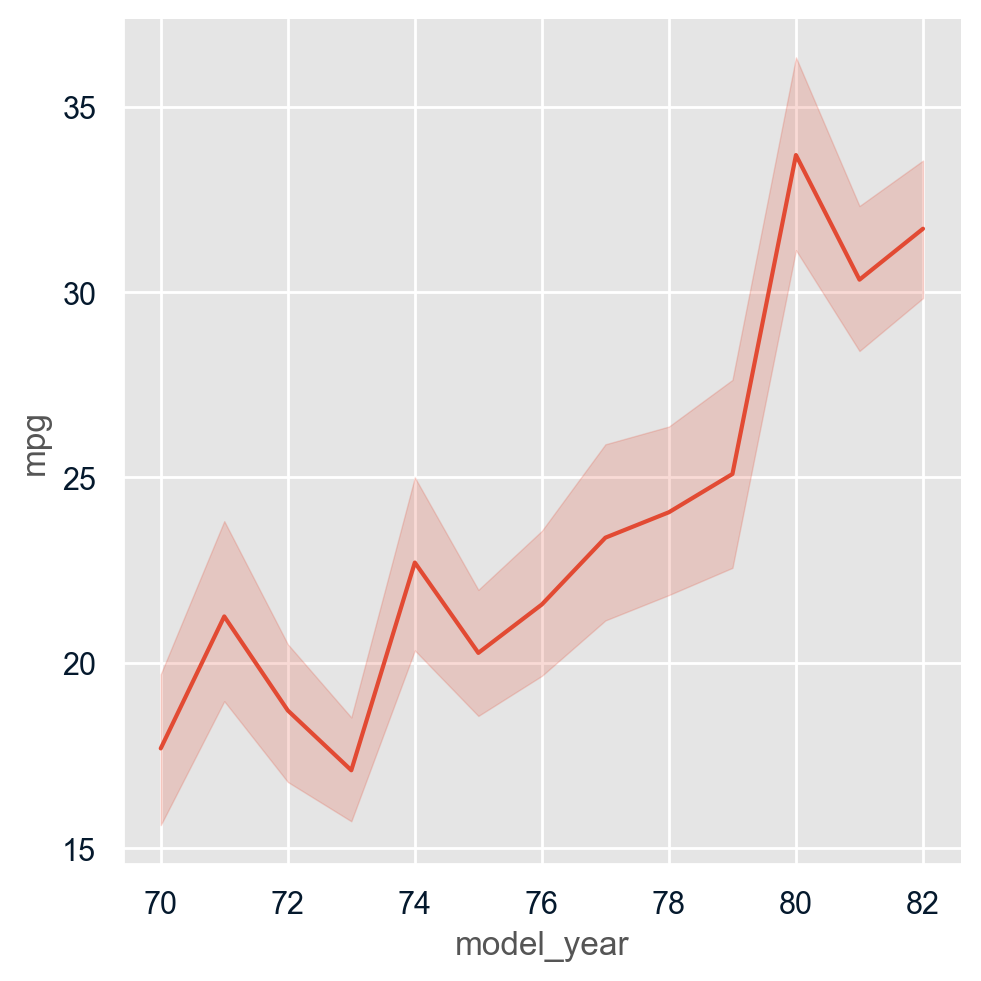

In [72]:
# Create line plot
sns.relplot(kind="line",x="model_year",y="mpg",data=mpg)
plt.show()

### **Visualizing standard deviation with line plots**
In the last exercise, we looked at how the **average** miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how **the distribution** of miles per gallon has changed over time.

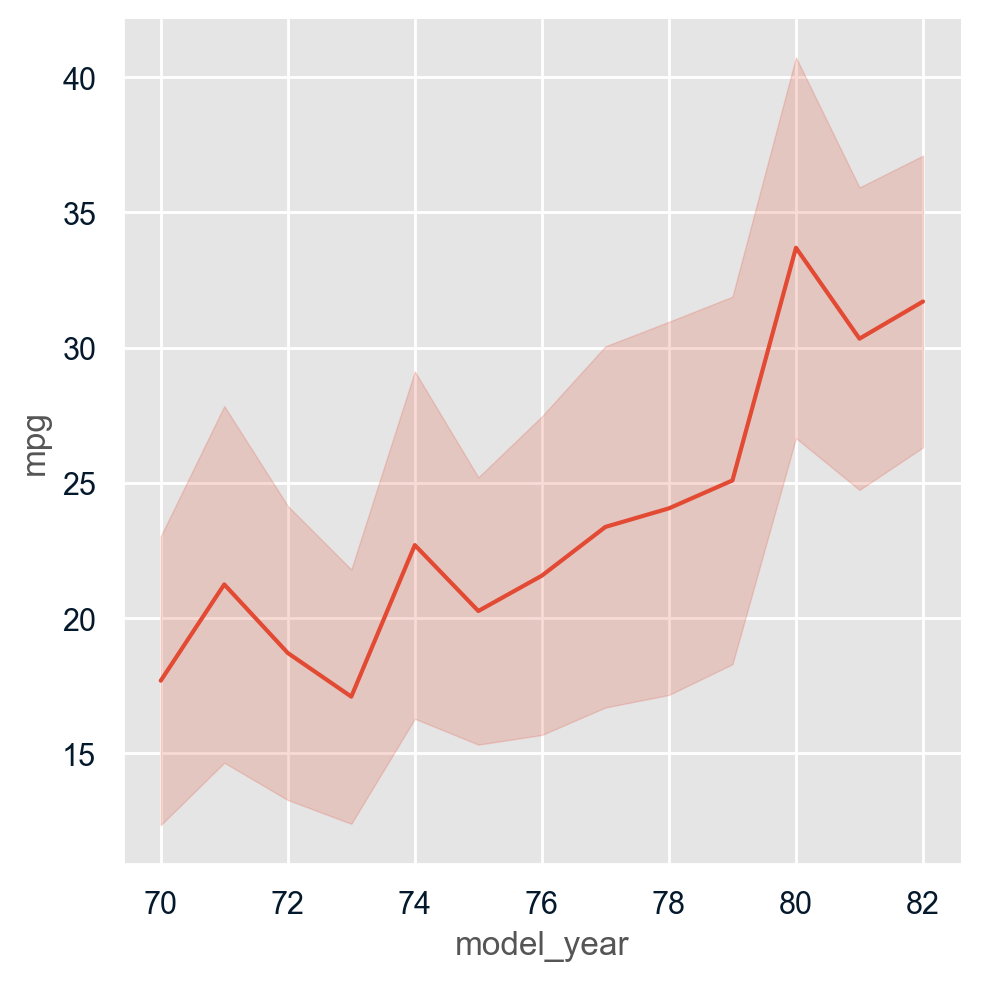

In [73]:
# Make the shaded area show the standard deviation(confidence interval=standard deviation)
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line",ci="sd")
plt.show()

### **Plotting subgroups in line plots**
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

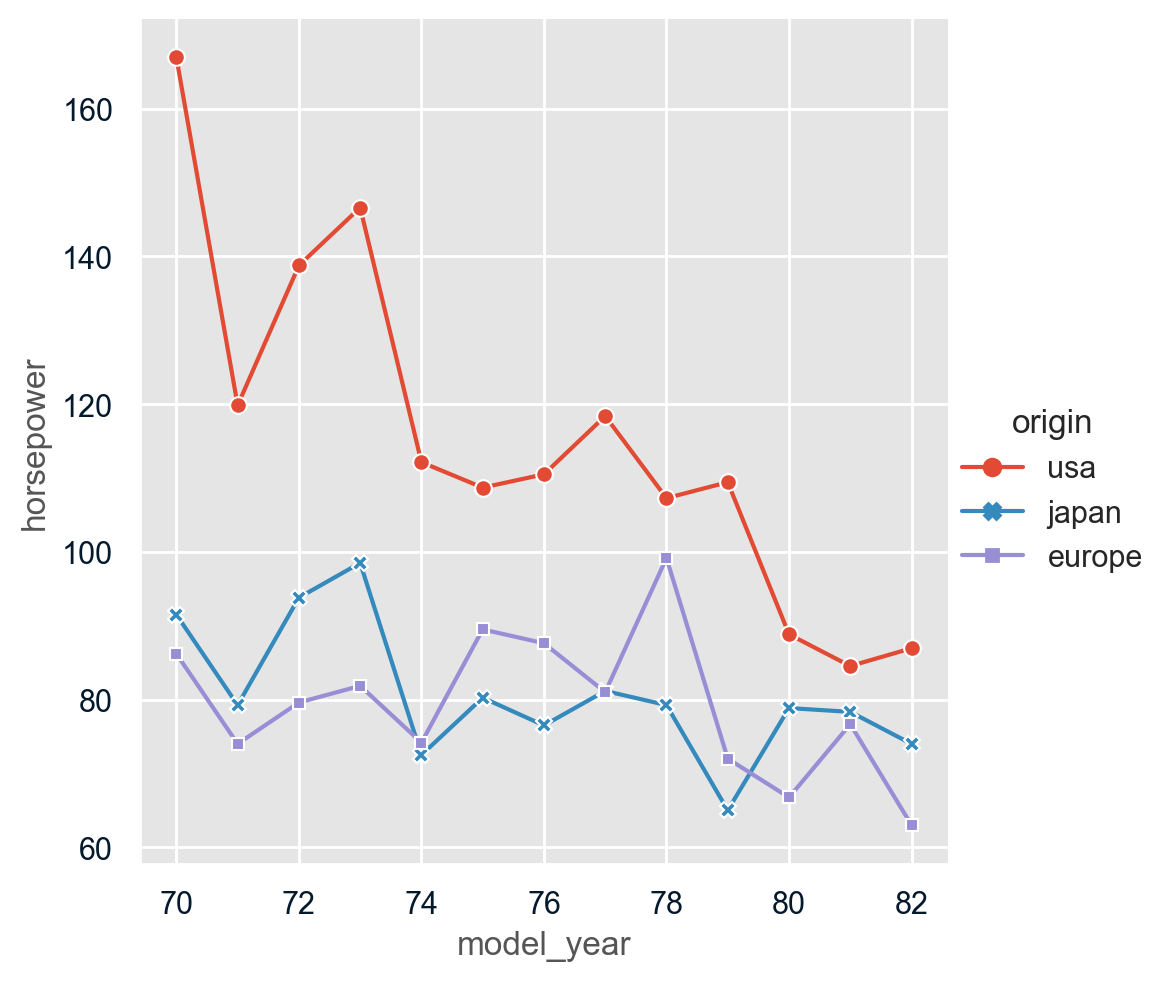

In [74]:
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin",markers=True,dashes=False)
plt.show()

# **CHAP3:(Count plots and bar plots)**
**_Note:_**

**Key Differences**
- Data Type: relplot() is used for continuous data, while catplot() is used for categorical data.
- Plot Types: relplot() is limited to scatter and line plots, whereas catplot() can create a variety of categorical plots.
- Use Cases: Use relplot() when you want to explore relationships between two continuous variables. Use catplot() when you want to compare categories.


=>In summary, choose relplot() for relationships and trends in continuous data, and catplot() for comparisons and distributions in categorical data.



### **Count plots**
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

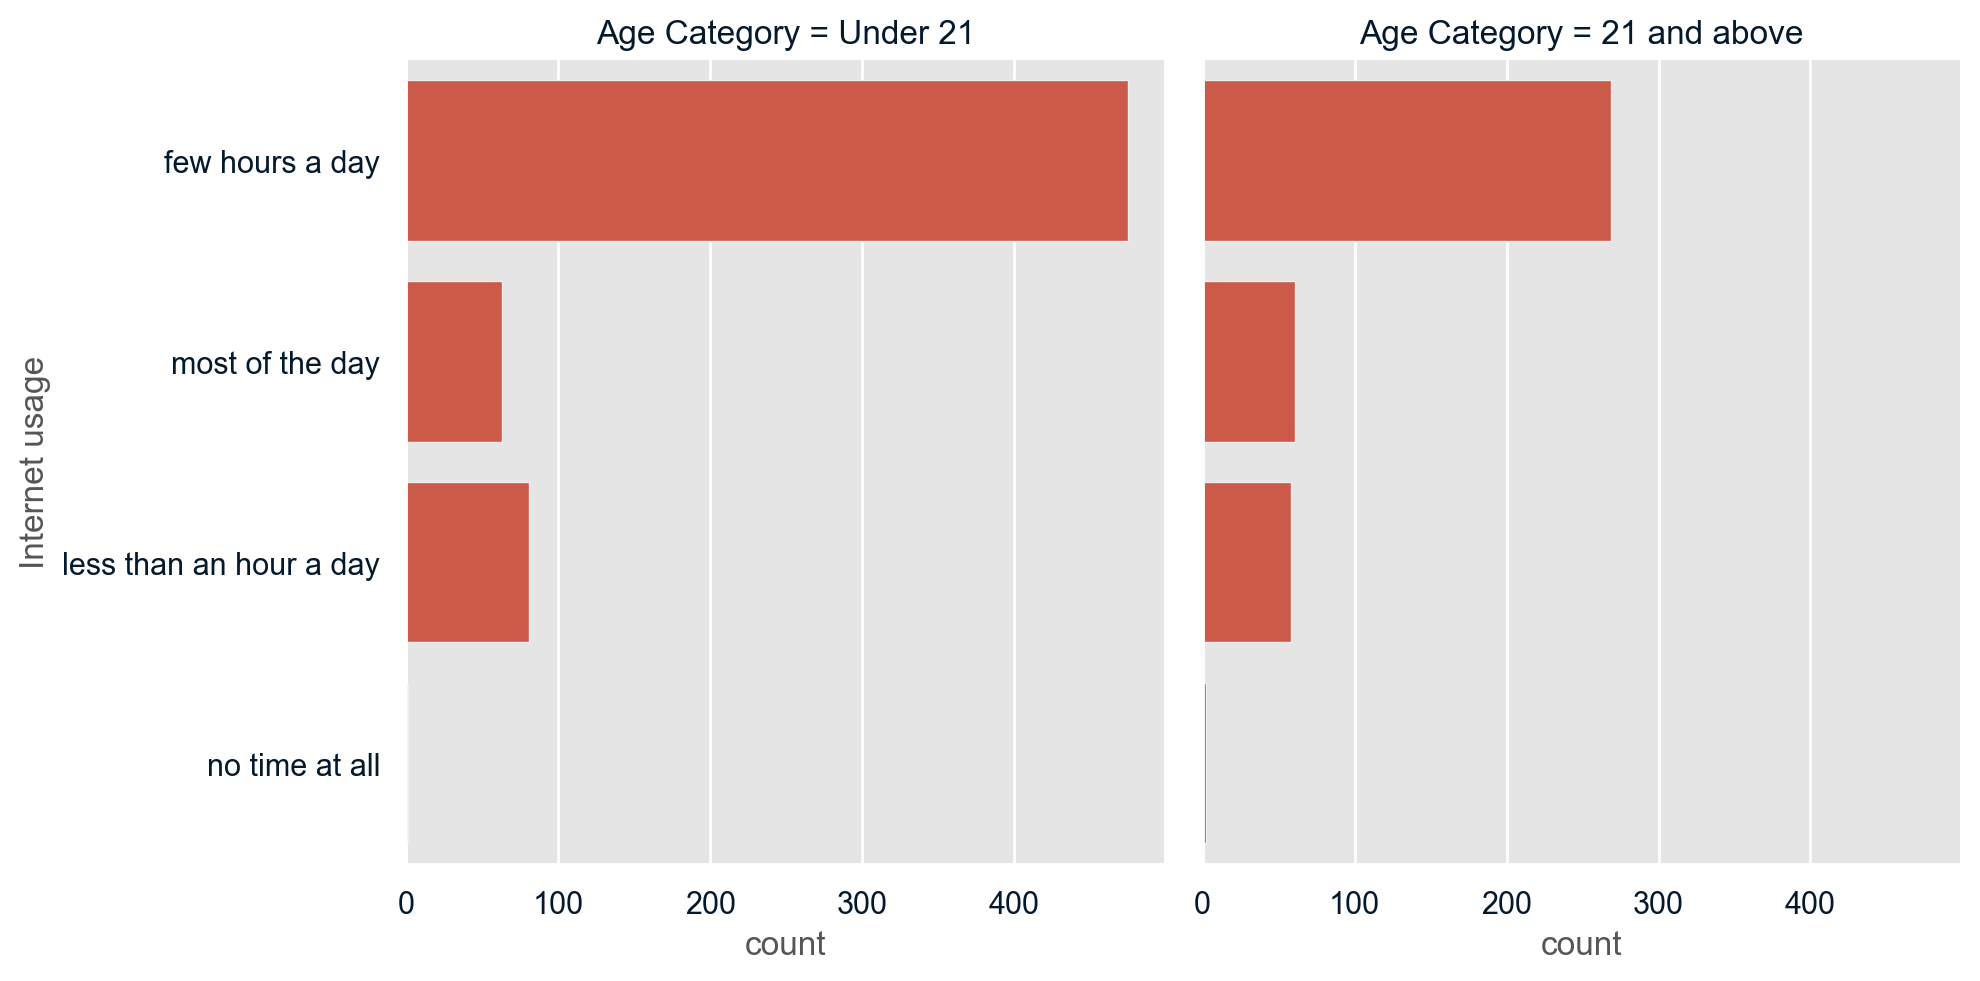

In [75]:

survey['Age Category'] = survey['Age'].apply(lambda x: 'Under 21' if x < 21 else '21 and above')

# Plot the count plot with the new 'Age Category' column
sns.catplot(y="Internet usage", data=survey,
            kind="count", col="Age Category")
plt.show()

### **Customizing bar plots**
In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

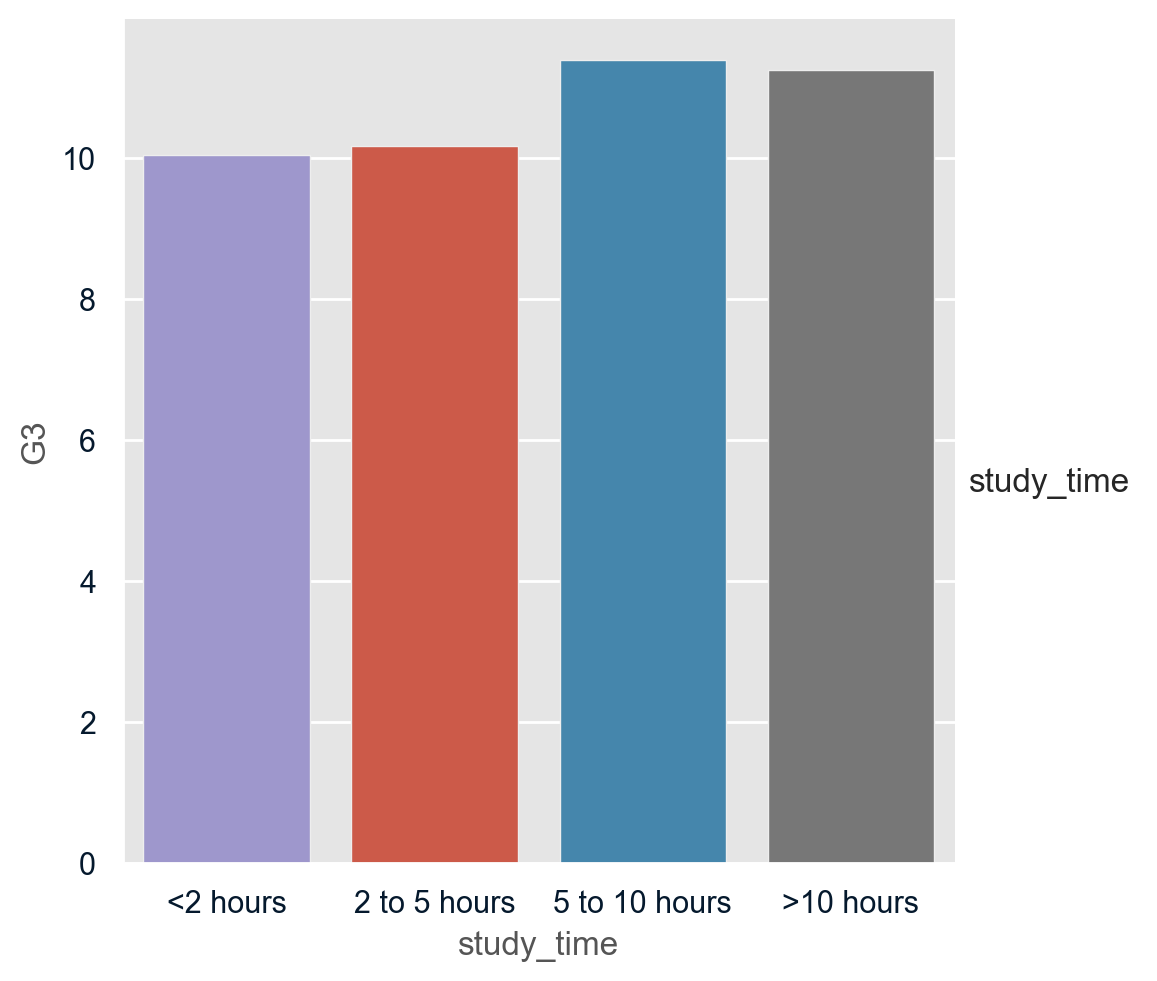

In [76]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order,ci=None,hue="study_time")

# Show plot
plt.show()

### **Create and interpret a box plot**
Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade ("G3") among students in different categories of "study_time"

In this exercise, we'll try using a box plot look at this relationship instead

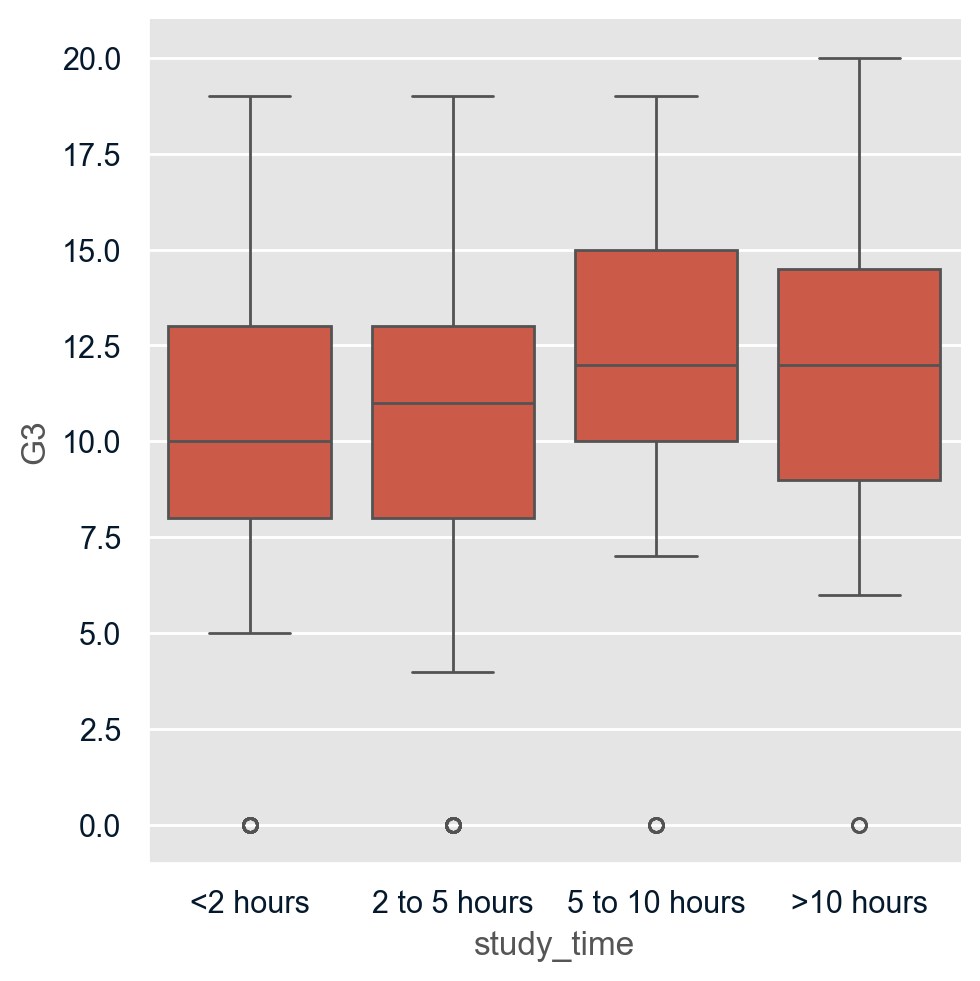

In [77]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(kind="box",data=student_data,x="study_time",y="G3",order=study_time_order)
plt.show()

### **Omitting outliers**
Now let's use the student_data dataset to compare the distribution of final grades ("G3") between students who have internet access at home and those who don't. To do this, we'll use the "internet" variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the "location" variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

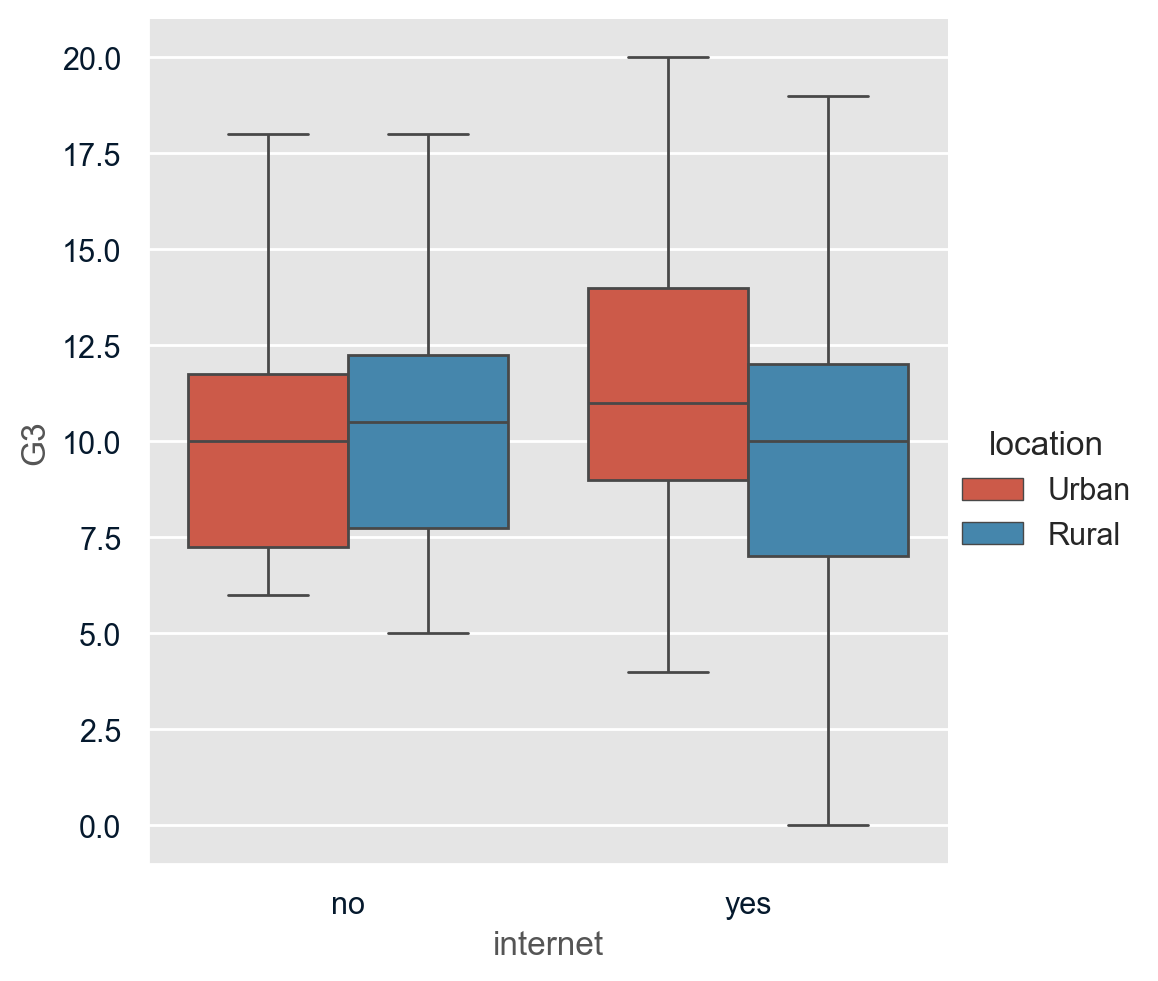

In [78]:
sns.catplot(data=student_data, kind="box", x="internet", y="G3", hue="location", showfliers=False)
plt.show()

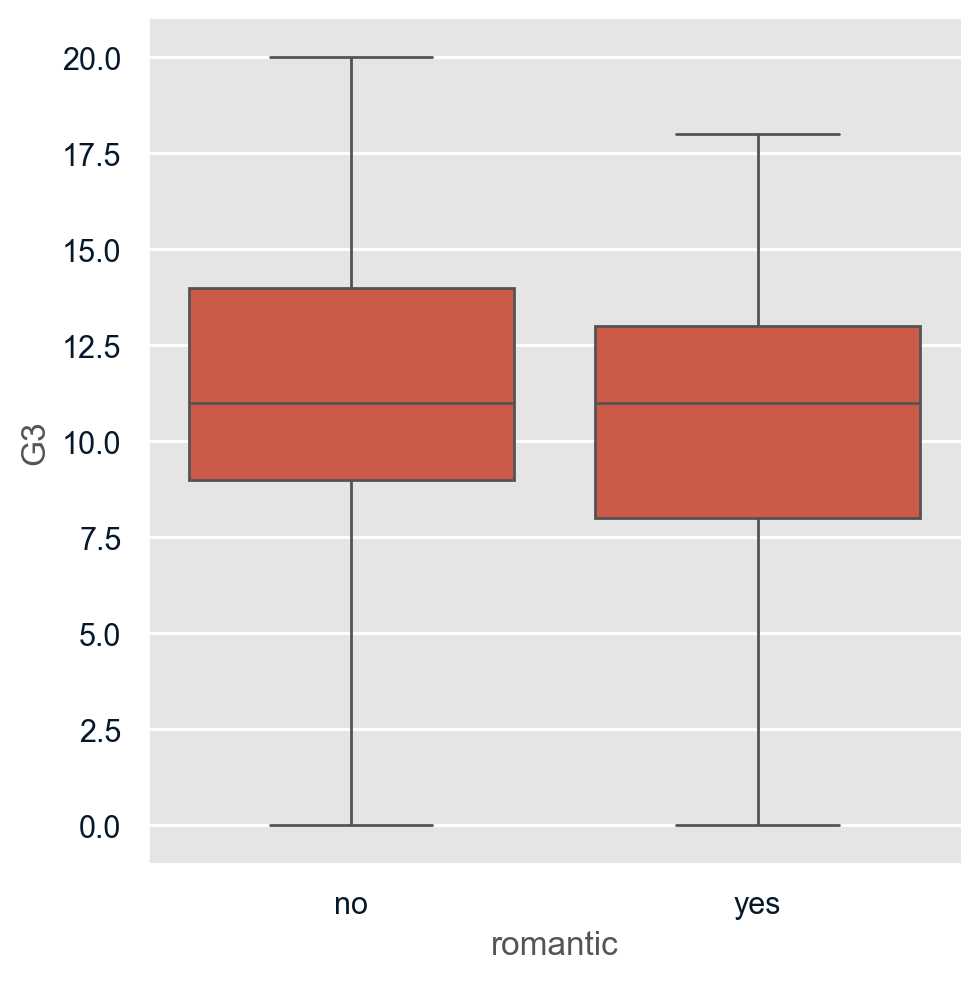

In [79]:
#Adjusting the whiskers
# Set the whiskers at the min and max values
#by default whis=1.5
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])
plt.show()

### **Customizing point plots**
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the "famrel" variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

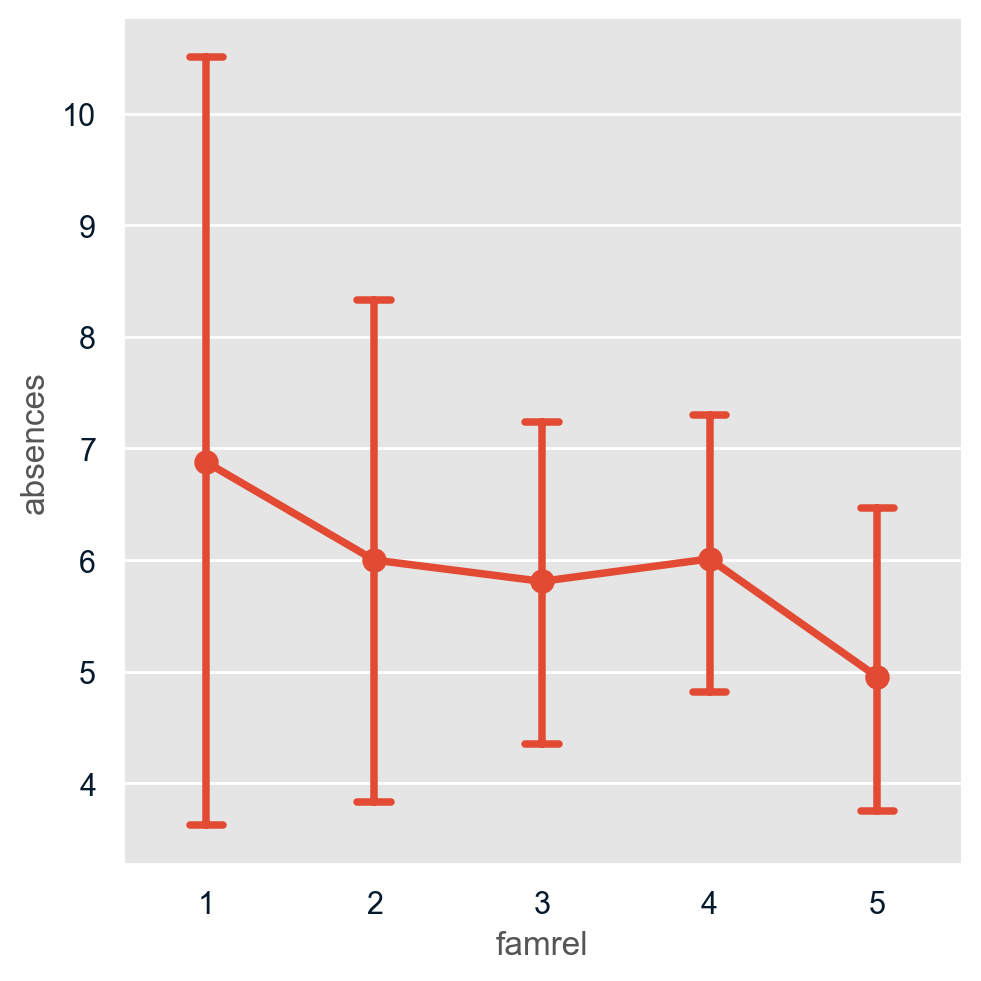

In [80]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2)
#set join=False to remove the join lines

plt.show()

### **Point plots with subgroups**
Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

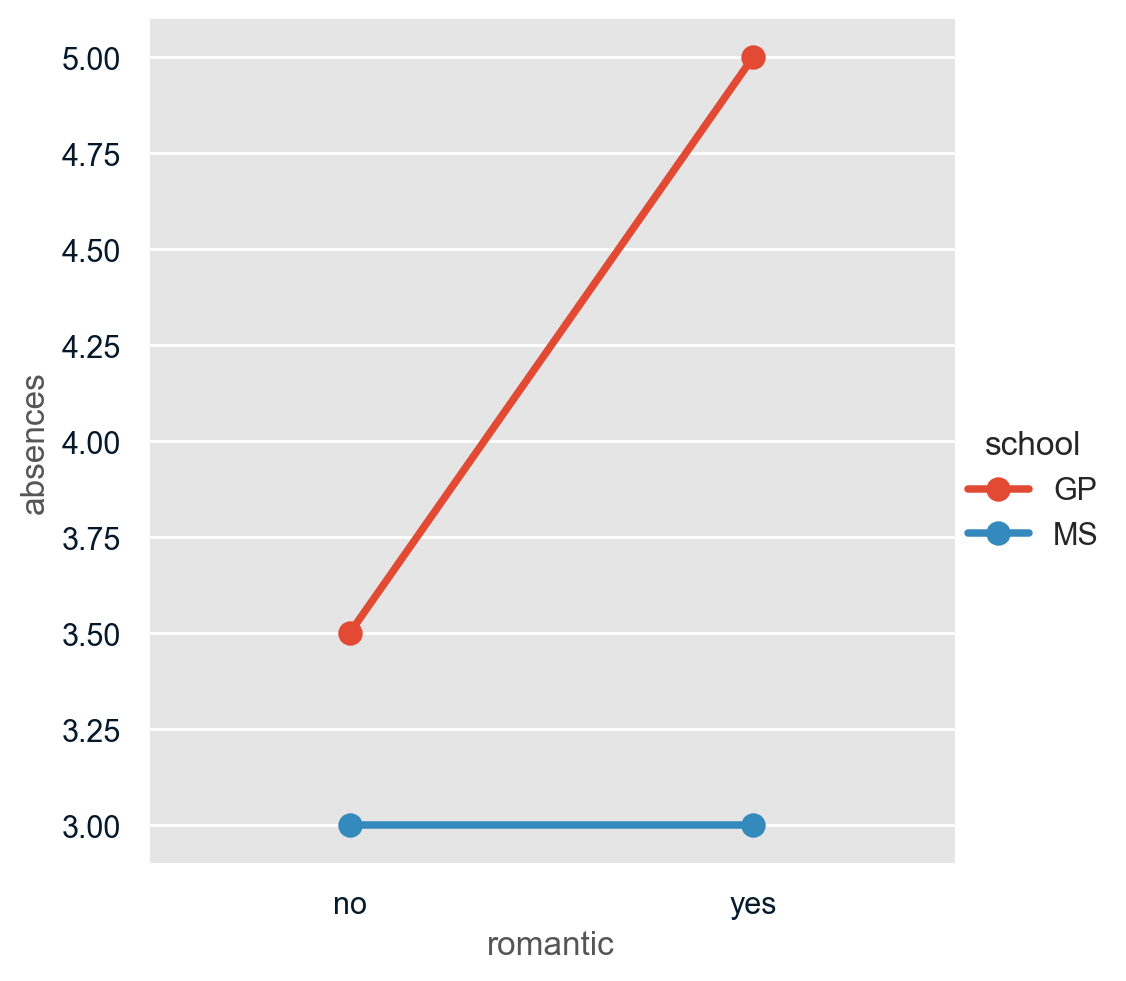

In [81]:
from numpy import median
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None,estimator=median)

# Since there may be outliers of students with many absences we used the median
plt.show()

# **CHAP4:(changing plot style & color)**
let' try to apply various styles and colors on one of the last plot 

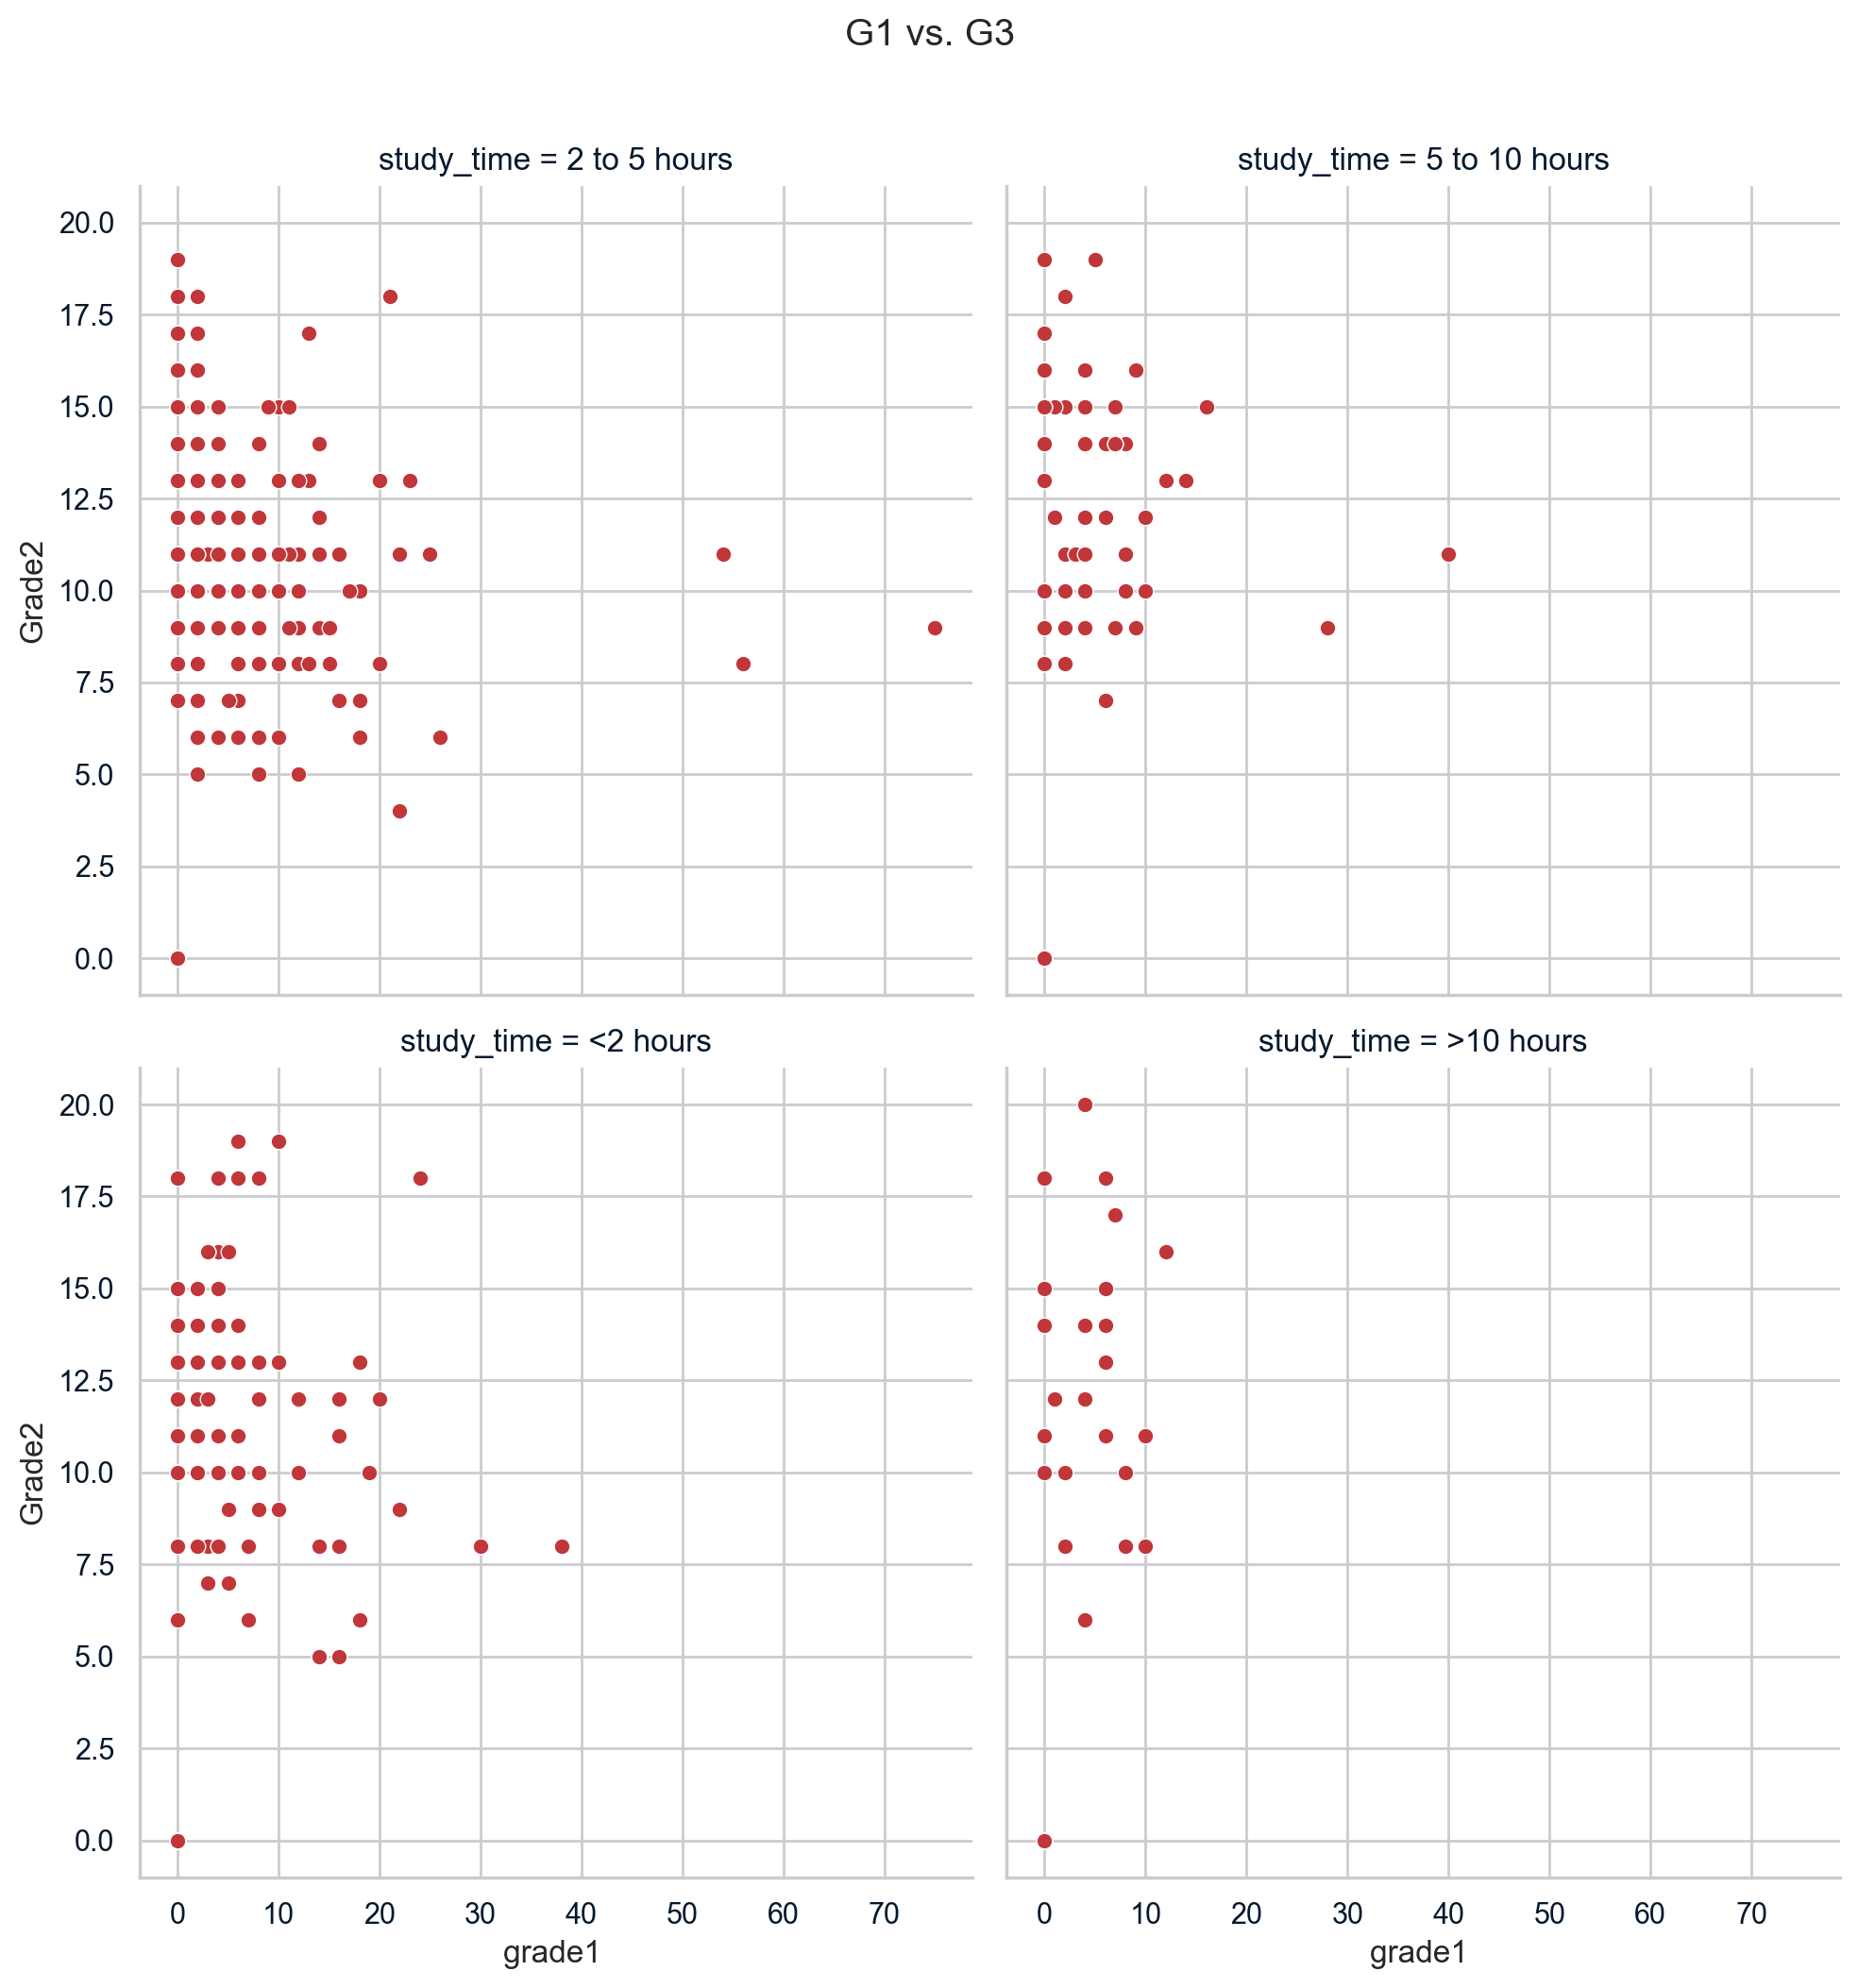

In [82]:
#Changing style and palette
sns.set_style("whitegrid") #pre-defined: ticks / dark /darkgrid
sns.set_palette("RdBu") #pre-defined: RdBu / PRGn / RdBu_r / PRGn_r / Greys / Blues / PuRd / GnBu / Purples
# we can also use a custom palette list
sns.set_context("notebook") # pre-defined: talk / paper /poster

#previous code
#***********************************
g=sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            col="study_time"
            ,col_wrap=2
            )
#***********************************
#this is how to add a title 
# adjust Y to set the title in the right position
g.fig.suptitle("G1 vs. G3",y=1.05)
# Add x-axis and y-axis labels
g.set(xlabel="grade1 ",ylabel="Grade2")
#we can rotat the xticks like that
#plt.xticks(rotation=90)

plt.show()